In [1]:
from pyspark.sql import SparkSession

In [20]:
from pyspark.sql import functions as F

In [2]:
ss = SparkSession.builder.appName("salary_json").getOrCreate()

In [3]:
df = ss.read.parquet('userdata1.parquet')

In [5]:
df.head(1)

[Row(registration_dttm=datetime.datetime(2016, 2, 3, 13, 25, 29), id=1, first_name='Amanda', last_name='Jordan', email='ajordan0@com.com', gender='Female', ip_address='1.197.201.2', cc='6759521864920116', country='Indonesia', birthdate='3/8/1971', salary=49756.53, title='Internal Auditor', comments='1E+02')]

In [6]:
df.columns

['registration_dttm',
 'id',
 'first_name',
 'last_name',
 'email',
 'gender',
 'ip_address',
 'cc',
 'country',
 'birthdate',
 'salary',
 'title',
 'comments']

In [13]:
df.count()

1000

In [17]:
df.select(['salary']).describe().show()

+-------+------------------+
|summary|            salary|
+-------+------------------+
|  count|               932|
|   mean|149005.35665236053|
| stddev| 79785.17673591433|
|    min|          12380.49|
|    max|         286592.99|
+-------+------------------+



In [40]:
gender_df = df.select(['gender']).groupby(['gender']).agg(F.count('gender'))

In [41]:
gender_df.collect()

[Row(gender='Female', count(gender)=482),
 Row(gender='Male', count(gender)=451),
 Row(gender='', count(gender)=67)]

In [42]:
type(gender_df)

pyspark.sql.dataframe.DataFrame

In [28]:
# this is row object but we need values so converting it into rdd & get values out of it
gender_no = gender_df.rdd.map(lambda x: (x.gender,x['count(gender)'])).collect()

In [29]:
gender_no

[('Female', 482), ('Male', 451), ('', 67)]

In [37]:
import pandas as pd
gender_count_df = pd.DataFrame(gender_no,columns=['Gender','Count'])

In [38]:
gender_count_df

,Gender,Count
0,Female,482
1,Male,451
2,,67


In [43]:
# another method to create pandas dataframe from pyspark sql dataframe
gender_pandas_df = gender_df.toPandas()

In [44]:
gender_pandas_df

,gender,count(gender)
0,Female,482
1,Male,451
2,,67


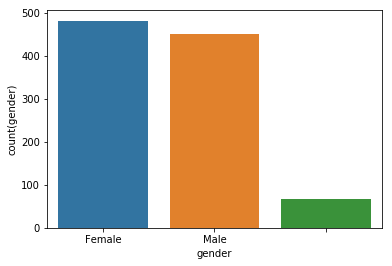

In [46]:
import seaborn as sns
sns.barplot(x="gender",y="count(gender)",data=gender_pandas_df)

In [47]:
# with extermly large data set we normally take random sample & plot the data since 
# all plotting library works on single machine if data is too large to fit it on single machine 
# we have to take samples to approximate graphs

In [48]:
#using SQL to analyse data

In [52]:
df.createOrReplaceTempView('parq')

In [54]:
ss.sql("select * from parq limit 2").collect()

[Row(registration_dttm=datetime.datetime(2016, 2, 3, 13, 25, 29), id=1, first_name='Amanda', last_name='Jordan', email='ajordan0@com.com', gender='Female', ip_address='1.197.201.2', cc='6759521864920116', country='Indonesia', birthdate='3/8/1971', salary=49756.53, title='Internal Auditor', comments='1E+02'),
 Row(registration_dttm=datetime.datetime(2016, 2, 3, 22, 34, 3), id=2, first_name='Albert', last_name='Freeman', email='afreeman1@is.gd', gender='Male', ip_address='218.111.175.34', cc='', country='Canada', birthdate='1/16/1968', salary=150280.17, title='Accountant IV', comments='')]

In [55]:
ss.sql("select gender,count(gender)gender_count from parq group by gender").collect()

[Row(gender='Female', gender_count=482),
 Row(gender='Male', gender_count=451),
 Row(gender='', gender_count=67)]

In [56]:
# min & max salary
ss.sql("select min(salary),max(salary) from parq").collect()

[Row(min(salary)=12380.49, max(salary)=286592.99)]

In [60]:
# dataset consist of which all countries & size of data for each country
ss.sql("select country,count(country) country_count from parq group by country order by country_count desc").collect()

[Row(country='China', country_count=189),
 Row(country='Indonesia', country_count=97),
 Row(country='Russia', country_count=62),
 Row(country='Philippines', country_count=45),
 Row(country='Brazil', country_count=38),
 Row(country='Portugal', country_count=38),
 Row(country='France', country_count=37),
 Row(country='Poland', country_count=35),
 Row(country='Sweden', country_count=25),
 Row(country='Japan', country_count=20),
 Row(country='Canada', country_count=19),
 Row(country='United States', country_count=17),
 Row(country='Ukraine', country_count=16),
 Row(country='Peru', country_count=14),
 Row(country='Colombia', country_count=14),
 Row(country='Argentina', country_count=13),
 Row(country='Thailand', country_count=12),
 Row(country='Czech Republic', country_count=12),
 Row(country='Finland', country_count=11),
 Row(country='Nigeria', country_count=11),
 Row(country='Mexico', country_count=11),
 Row(country='South Africa', country_count=9),
 Row(country='Malaysia', country_count=

In [64]:
# how many people are with salary more than 10k
ss.sql("select count(1) from parq where salary > 10000").collect()

[Row(count(1)=932)]

In [66]:
# distinct titiles 
ss.sql("select distinct(title) from parq").collect()

[Row(title='Systems Administrator II'),
 Row(title='Media Manager III'),
 Row(title='Recruiting Manager'),
 Row(title='Geologist II'),
 Row(title='Geologist III'),
 Row(title='Database Administrator IV'),
 Row(title='Financial Analyst'),
 Row(title='Analyst Programmer'),
 Row(title='Accountant IV'),
 Row(title='Software Engineer II'),
 Row(title='Computer Systems Analyst IV'),
 Row(title='Product Engineer'),
 Row(title='Software Test Engineer II'),
 Row(title='Junior Executive'),
 Row(title='Systems Administrator III'),
 Row(title='VP Marketing'),
 Row(title='Human Resources Assistant III'),
 Row(title='Environmental Tech'),
 Row(title='Mechanical Systems Engineer'),
 Row(title='Nuclear Power Engineer'),
 Row(title='Assistant Professor'),
 Row(title='Information Systems Manager'),
 Row(title='Executive Secretary'),
 Row(title='Statistician IV'),
 Row(title='Account Coordinator'),
 Row(title='Web Developer II'),
 Row(title='Sales Associate'),
 Row(title='Account Representative I'),
 Row

In [85]:
# what is title for highest salary taker
df.dropna().sort('salary',ascending=False).select('title','salary','first_name','last_name').show(5)

+-------------------+---------+----------+---------+
|              title|   salary|first_name|last_name|
+-------------------+---------+----------+---------+
|          Librarian|286592.99|     Kathy| Reynolds|
|                   |286061.25|    Ronald|     Ross|
|                   |285036.95|     Billy|    Reyes|
|Associate Professor|284737.57|  Kathleen|   Graham|
|Marketing Assistant|284728.99|      Todd|  Alvarez|
+-------------------+---------+----------+---------+
only showing top 5 rows



In [86]:
# first person to register & registration year

In [102]:
from pyspark.sql.functions import year,month,dayofmonth
df = df.withColumn("Year",year('registration_dttm'))
df = df.withColumn("month",month('registration_dttm'))
df = df.withColumn("dayofmonth",dayofmonth('registration_dttm'))

In [106]:
df.sort("registration_dttm").select('first_name','last_name',"year","month","dayofmonth").show(5)

+----------+---------+----+-----+----------+
|first_name|last_name|year|month|dayofmonth|
+----------+---------+----+-----+----------+
|   Shirley| Williams|2016|    2|         3|
|    Daniel|  Spencer|2016|    2|         3|
|   Lillian|   Murray|2016|    2|         3|
|     Carol|Patterson|2016|    2|         3|
|     Sarah|  Freeman|2016|    2|         3|
+----------+---------+----+-----+----------+
only showing top 5 rows



In [107]:
# lower all name in dataframe

In [108]:
from pyspark.sql.functions import udf
lower = udf(lambda x: x.lower())

In [113]:
df = df.withColumn("first_name",lower("first_name"))
df = df.withColumn("last_name",lower("last_name"))

In [116]:
df.take(1)

[Row(registration_dttm=datetime.datetime(2016, 2, 3, 13, 25, 29), id=1, first_name='amanda', last_name='jordan', email='ajordan0@com.com', gender='Female', ip_address='1.197.201.2', cc='6759521864920116', country='Indonesia', birthdate='3/8/1971', salary=49756.53, title='Internal Auditor', comments='1E+02', Year=2016, month=2, dayofmonth=3)]

In [119]:
first_4_name = ss.sql("select lower(first_name) from parq limit 5")

In [121]:
first_4_name.show()

+-----------------+
|lower(first_name)|
+-----------------+
|           amanda|
|           albert|
|           evelyn|
|           denise|
|           carlos|
+-----------------+

